In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the McDonald's dataset

mcdonalds_df = pd.read_csv('mcdonalds.csv')

# Inspect basic features of the dataset
print("Column Names:", mcdonalds_df.columns.tolist())
print("Dimensions:", mcdonalds_df.shape)
print("First Three Rows:")
print(mcdonalds_df.head(3))

# Extract the first eleven columns and convert YES/NO to numeric binary (1/0)
segmentation_columns = mcdonalds_df.columns[:11]
#MD_x = mcdonalds_df[segmentation_columns].applymap(lambda x: 1 if x == "Yes" else 0)
MD_x = mcdonalds_df[segmentation_columns].replace({"Yes": 1, "No": 0})

# Check that the data has been transformed correctly by inspecting the average value of each variable
col_means = MD_x.mean().round(2)
print("Column Means:")
print(col_means)



Column Names: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Dimensions: (1453, 15)
First Three Rows:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
Column Means:
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


C:\Users\amina\AppData\Local\Temp\ipykernel_41592\3048954821.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD_x = mcdonalds_df[segmentation_columns].replace({"Yes": 1, "No": 0})


In [2]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [3]:
# Perform Principal Components Analysis (PCA) without standardization
pca = PCA()
MD_pca = pca.fit_transform(MD_x)


In [4]:
MD_pca


array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [5]:
# Get the standard deviations (square roots of the eigenvalues)
std_devs = np.sqrt(pca.explained_variance_)

# Calculate the proportion of variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative proportion of variance
cumulative_variance = np.cumsum(explained_variance)



In [6]:
# Prepare and print the PCA importance output in a properly aligned column-wise format
importance_output = "Importance of components:\n"
importance_output += f"{'':<20}{'PC1':<10}{'PC2':<10}{'PC3':<10}{'PC4':<10}{'PC5':<10}\n"
importance_output += f"{'Standard deviation':<20}{std_devs[0]:<10.4f}{std_devs[1]:<10.4f}{std_devs[2]:<10.4f}{std_devs[3]:<10.4f}{std_devs[4]:<10.5f}\n"
importance_output += f"{'Proportion of Variance':<20}{explained_variance[0]:<10.4f}{explained_variance[1]:<10.4f}{explained_variance[2]:<10.4f}{explained_variance[3]:<10.4f}{explained_variance[4]:<10.5f}\n"
importance_output += f"{'Cumulative Proportion':<20}{cumulative_variance[0]:<10.4f}{cumulative_variance[1]:<10.4f}{cumulative_variance[2]:<10.4f}{cumulative_variance[3]:<10.4f}{cumulative_variance[4]:<10.5f}\n"

importance_output += f"\n{'':<20}{'PC6':<10}{'PC7':<10}{'PC8':<10}{'PC9':<10}\n"
importance_output += f"{'Standard deviation':<20}{std_devs[5]:<10.4f}{std_devs[6]:<10.5f}{std_devs[7]:<10.5f}{std_devs[8]:<10.5f}\n"
importance_output += f"{'Proportion of Variance':<20}{explained_variance[5]:<10.4f}{explained_variance[6]:<10.5f}{explained_variance[7]:<10.5f}{explained_variance[8]:<10.5f}\n"
importance_output += f"{'Cumulative Proportion':<20}{cumulative_variance[5]:<10.4f}{cumulative_variance[6]:<10.5f}{cumulative_variance[7]:<10.5f}{cumulative_variance[8]:<10.5f}\n"

importance_output += f"\n{'':<20}{'PC10':<10}{'PC11':<10}\n"
importance_output += f"{'Standard deviation':<20}{std_devs[9]:<10.5f}{std_devs[10]:<10.5f}\n"
importance_output += f"{'Proportion of Variance':<20}{explained_variance[9]:<10.5f}{explained_variance[10]:<10.5f}\n"
importance_output += f"{'Cumulative Proportion':<20}{cumulative_variance[9]:<10.5f}{cumulative_variance[10]:<10.5f}\n"

print(importance_output)


Importance of components:
                    PC1       PC2       PC3       PC4       PC5       
Standard deviation  0.7570    0.6075    0.5046    0.3988    0.33741   
Proportion of Variance0.2994    0.1928    0.1330    0.0831    0.05948   
Cumulative Proportion0.2994    0.4922    0.6253    0.7084    0.76787   

                    PC6       PC7       PC8       PC9       
Standard deviation  0.3103    0.28970   0.27512   0.26525   
Proportion of Variance0.0503    0.04385   0.03955   0.03676   
Cumulative Proportion0.8182    0.86201   0.90156   0.93832   

                    PC10      PC11      
Standard deviation  0.24884   0.23690   
Proportion of Variance0.03235   0.02932   
Cumulative Proportion0.97068   1.00000   



In [7]:
# Calculate the standard deviations of each principal component
std_devs = np.sqrt(pca.explained_variance_)

# Round the standard deviations to match the R output format (1 decimal place)
std_devs_rounded = np.round(std_devs, 1)

std_devs_rounded


array([0.8, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2])

In [8]:
# Perform PCA again and get the factor loadings (rotation matrix)
loadings = pca.components_

# Create a DataFrame to display the factor loadings for each variable
loadings_df = pd.DataFrame(loadings.T, index=segmentation_columns, columns=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Round the loadings to 2 decimal places 
loadings_rounded = loadings_df.round(2)

loadings_rounded


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.48,0.36,-0.30,0.06,-0.31,0.17,-0.28,0.01,0.57,-0.11,0.05
convenient,-0.16,0.02,-0.06,-0.14,0.28,-0.35,-0.06,-0.11,-0.02,-0.67,-0.54
spicy,-0.01,0.02,-0.04,0.20,0.07,-0.36,0.71,0.38,0.40,-0.08,0.14
fattening,0.12,-0.03,-0.32,-0.35,-0.07,-0.41,-0.39,0.59,-0.16,-0.01,0.25
greasy,0.30,-0.06,-0.80,0.25,0.36,0.21,0.04,-0.14,-0.00,0.01,0.00
fast,-0.11,-0.09,-0.06,-0.10,0.11,-0.59,-0.09,-0.63,0.17,0.24,0.34
cheap,-0.34,-0.61,-0.15,0.12,-0.13,-0.10,-0.04,0.14,0.08,0.43,-0.49
tasty,-0.47,0.31,-0.29,-0.00,-0.21,-0.08,0.36,-0.07,-0.64,0.08,0.02
expensive,0.33,0.60,0.02,0.07,-0.00,-0.26,-0.07,0.03,0.07,0.45,-0.49
healthy,-0.21,0.08,0.19,0.76,0.29,-0.18,-0.35,0.18,-0.19,-0.04,0.16


In [9]:
# Format the loadings without reversing the signs
formatted_loadings = loadings_df.copy()  # Copy the original loadings DataFrame
formatted_loadings = formatted_loadings.round(3)  # Round to 3 decimal places to match the format

# Display the formatted loadings
formatted_loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,0.763,0.288,-0.178,-0.350,0.176,-0.186,-0.038,0.158


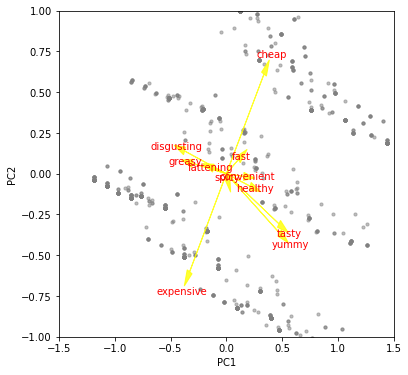

In [10]:
pca_projection = pca.fit_transform(MD_x)

# Loadings for the variables 
loadings = pca.components_.T

# Reverse the signs of the loadings to reflect the opposite direction
reversed_loadings = loadings * -1

# Plot the PCA projection with reversed loadings
plt.figure(figsize=(6, 6))
plt.scatter(pca_projection[:, 0], pca_projection[:, 1], color='grey', alpha=0.5, s=10)

# Plot the reversed loadings as arrows
for i, var in enumerate(segmentation_columns):
    plt.arrow(0, 0, reversed_loadings[i, 0], reversed_loadings[i, 1], color='yellow', alpha=0.8, head_width=0.05, head_length=0.1)
    plt.text(reversed_loadings[i, 0] * 1.2, reversed_loadings[i, 1] * 1.2, var, color='red', ha='center', va='center')

# Set axis limits and labels
plt.xlim(-1.5, 1.5)
plt.ylim(-1.0, 1.0)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.grid(False)
plt.show()


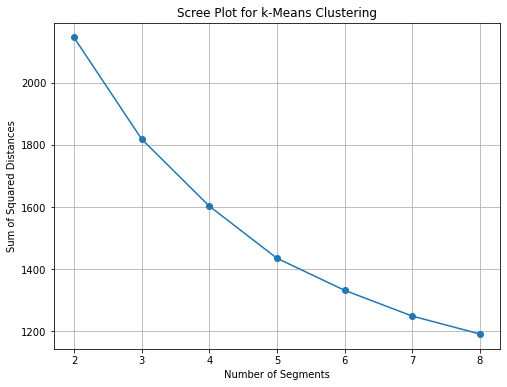

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Initialize the list to store the sum of squared distances
ssd = []

# Perform k-means clustering for a range of cluster numbers (2 to 8)
for num_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    ssd.append(kmeans.inertia_)  # Inertia is the sum of squared distances within clusters

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), ssd, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Squared Distances')
plt.title('Scree Plot for k-Means Clustering')
plt.grid(True)
plt.show()


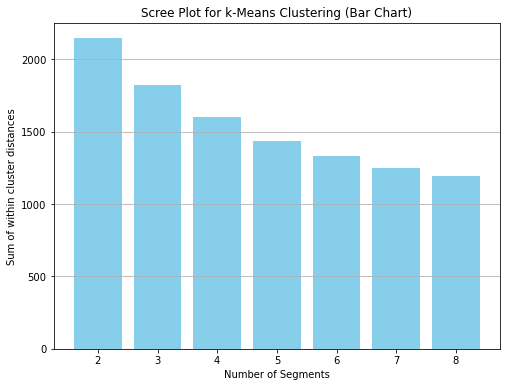

In [12]:
# Plot the scree plot as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(2, 9), ssd, color='skyblue')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of within cluster distances')
plt.title('Scree Plot for k-Means Clustering (Bar Chart)')
plt.xticks(range(2, 9))  # To ensure x-axis ticks match the number of segments
plt.grid(True, axis='y')
plt.show()



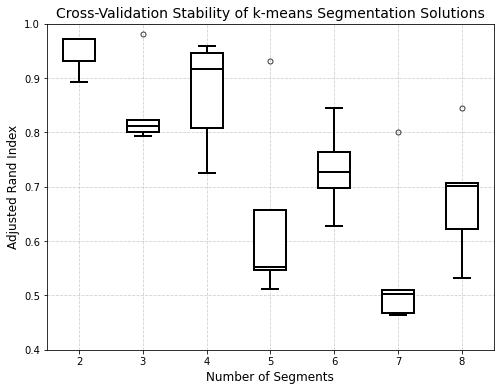

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

def cross_validation_kmeans_stability(X, n_clusters_range, n_splits=10, nrep=10):
    stability_scores = {n_clusters: [] for n_clusters in n_clusters_range}

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1234)
    labels_for_stratification = np.zeros(X.shape[0])  # Dummy variable for stratified splitting
    
    for n_clusters in n_clusters_range:
        aris = []
        for train_index, test_index in skf.split(X, labels_for_stratification):
            X_train, X_test = X[train_index], X[test_index]
            
            # Fit k-means on the training data
            kmeans_train = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=1234).fit(X_train)
            labels_train = kmeans_train.predict(X_train)
            
            # Predict cluster labels for the test data using the trained kmeans
            labels_test = kmeans_train.predict(X_test)
            
            # Fit k-means on the test data to get new cluster labels for comparison
            kmeans_test = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=1234).fit(X_test)
            labels_test_new = kmeans_test.labels_
            
            # Calculate the adjusted Rand index between the new test labels and the original test labels
            ari = adjusted_rand_score(labels_test, labels_test_new)
            aris.append(ari)
        
        stability_scores[n_clusters] = aris

    return stability_scores

n_clusters_range = range(2, 9)
stability_scores_cv = cross_validation_kmeans_stability(MD_x.to_numpy(), n_clusters_range, n_splits=5, nrep=10)

# Prepare data for boxplot
data_to_plot = [stability_scores_cv[n_clusters] for n_clusters in n_clusters_range]

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_to_plot, width=0.5, color='white', fliersize=5, linewidth=2,
            medianprops={'color': 'black'}, 
            boxprops={'facecolor': 'white', 'edgecolor': 'black'}, 
            whiskerprops={'color': 'black', 'linewidth': 2},
            capprops={'color': 'black'})

plt.ylim(0.4, 1.0)  # Adjusting y-limits to match the reference plot
plt.ylabel('Adjusted Rand Index', fontsize=12)
plt.xlabel('Number of Segments', fontsize=12)
plt.xticks(ticks=np.arange(0, 7), labels=np.arange(2, 9), fontsize=10)
plt.title('Cross-Validation Stability of k-means Segmentation Solutions', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


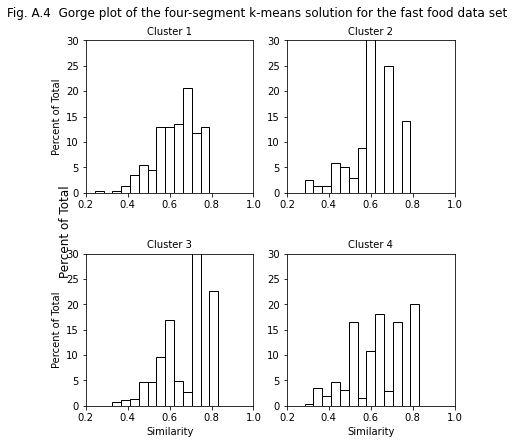

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances


# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(MD_x)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Calculate similarity (1 - normalized Euclidean distance) of each point to its cluster center
max_distance = np.max(pairwise_distances(MD_x, centers, metric='euclidean'))
similarities = 1 - (pairwise_distances(MD_x, centers, metric='euclidean') / max_distance)

# Extract the similarities for points in cluster 4 (which is cluster 3 in 0-indexed Python)
MD_km_4 = similarities[labels == 3, 3]

# Create a figure with subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Plot a histogram for each cluster
for i in range(4):
    cluster_similarities = similarities[labels == i, i]
    ax = axes[i // 2, i % 2]
    counts, bins, patches = ax.hist(cluster_similarities, bins=np.linspace(0.2, 1.0, 20), edgecolor='black', color='white')
    
    # Convert counts to percentages
    counts_percentage = counts / counts.sum() * 100
    
    # Clear and replot with percentages
    ax.clear()
    ax.bar(bins[:-1], counts_percentage, width=np.diff(bins), edgecolor='black', color='white', align='edge')
    
    ax.set_xlim(0.2, 1.0)  # Limiting x-axis to [0.2, 1.0]
    ax.set_ylim(0, 30)
    ax.set_title(f'Cluster {i + 1}', fontsize=10)
    
    if i in [0, 2]:
        ax.set_ylabel('Percent of Total', fontsize=10)
    if i in [2, 3]:
        ax.set_xlabel('Similarity', fontsize=10)

# Adjust layout to closely resemble the reference
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.4)



# Add overall y-axis label
fig.text(0.04, 0.5, 'Percent of Total', va='center', rotation='vertical', fontsize=12)

# Add figure title
fig.suptitle('Fig. A.4  Gorge plot of the four-segment k-means solution for the fast food data set', 
             fontsize=12, y=1.02)

plt.show()


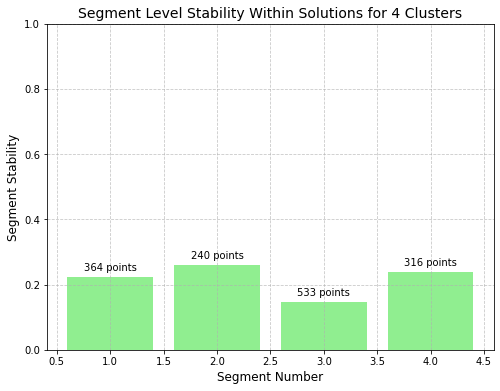

In [18]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def segment_level_stability(X, n_clusters=4, n_bootstrap=100):
    """
    Calculate segment level stability within solutions using bootstrapped samples.

    :param X: Input data (numpy array or DataFrame)
    :param n_clusters: Number of clusters for KMeans
    :param n_bootstrap: Number of bootstrap samples to generate
    :return: Stability score for each segment
    """
    # Fit initial KMeans model
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    labels_original = kmeans.fit_predict(X)
    stability_scores = np.zeros(n_clusters)
    
    # Bootstrapping
    for _ in range(n_bootstrap):
        # Generate a bootstrap sample and the corresponding indices
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_bootstrap = X[indices]
        
        # Fit KMeans on the bootstrap sample
        kmeans_bootstrap = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234).fit(X_bootstrap)
        labels_bootstrap = kmeans_bootstrap.predict(X)
        
        # Compute stability for each segment
        for cluster in range(n_clusters):
            # Get the original segment members
            original_segment_members = (labels_original == cluster)
            # Calculate stability as the proportion of points remaining in the same segment
            stability_scores[cluster] += np.mean(labels_bootstrap[original_segment_members] == cluster)
    
    # Average stability across all bootstrap samples
    stability_scores /= n_bootstrap
    return stability_scores, labels_original

# Assuming MD_x is your dataset in DataFrame format
n_clusters = 4
stability_scores, selected_clusters = segment_level_stability(MD_x.to_numpy(), n_clusters=n_clusters, n_bootstrap=100)

# Plot the segment level stability with selected clusters
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_clusters + 1), stability_scores, color='lightgreen')
plt.ylim(0, 1.0)
plt.xlabel('Segment Number', fontsize=12)
plt.ylabel('Segment Stability', fontsize=12)
plt.title(f'Segment Level Stability Within Solutions for {n_clusters} Clusters', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate the bar plot with the number of points in each cluster
for i in range(n_clusters):
    plt.text(i + 1, stability_scores[i] + 0.02, f'{np.sum(selected_clusters == i)} points', ha='center', fontsize=10)

plt.show()


k=2, converged=True, logLik=11147.82, AIC=-21985.64, BIC=-21167.03, ICL=-21167.03
k=3, converged=True, logLik=14126.45, AIC=-27786.90, BIC=-26556.34, ICL=-26556.34
k=4, converged=True, logLik=17513.54, AIC=-34405.08, BIC=-32762.57, ICL=-32763.13
k=5, converged=True, logLik=22500.93, AIC=-44223.86, BIC=-42169.40, ICL=-42169.43
k=6, converged=True, logLik=28522.04, AIC=-56110.08, BIC=-53643.68, ICL=-53643.68
k=7, converged=True, logLik=29652.48, AIC=-58214.95, BIC=-55336.60, ICL=-55336.65
k=8, converged=True, logLik=26714.81, AIC=-52183.62, BIC=-48893.32, ICL=-48893.65


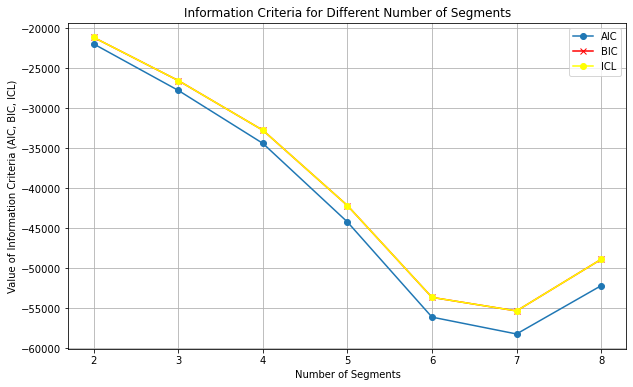

In [19]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture



# Fit Gaussian Mixture Models for k=2 to k=8

results = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    logLik = gmm.score(MD_x) * MD_x.shape[0]  # Calculate log-likelihood
    bic = gmm.bic(MD_x)
    posterior_probs = gmm.predict_proba(MD_x)
    icl = bic + 2 * np.sum(np.log(posterior_probs.max(axis=1)))
    results.append({
        'k': k,
        'converged': gmm.converged_,
        'logLik': logLik,
        'AIC': gmm.aic(MD_x),
        'BIC': bic,
        'ICL': icl
    })

# Print results
for res in results:
    print(f"k={res['k']}, converged={res['converged']}, logLik={res['logLik']:.2f}, AIC={res['AIC']:.2f}, BIC={res['BIC']:.2f}, ICL={res['ICL']:.2f}")   


# Extract values for plotting
k_values = [res['k'] for res in results]
aic_values = [res['AIC'] for res in results]
bic_values = [res['BIC'] for res in results]
icl_values = [res['ICL'] for res in results]

# Plotting Information Criteria
plt.figure(figsize=(10, 6))
plt.plot(k_values, aic_values, label='AIC', marker='o')
plt.plot(k_values, bic_values, label='BIC', marker='x',color='red')
plt.plot(k_values, icl_values, label='ICL', marker='o',color='yellow')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Information Criteria for Different Number of Segments')
plt.legend()
plt.grid(True)
plt.show()


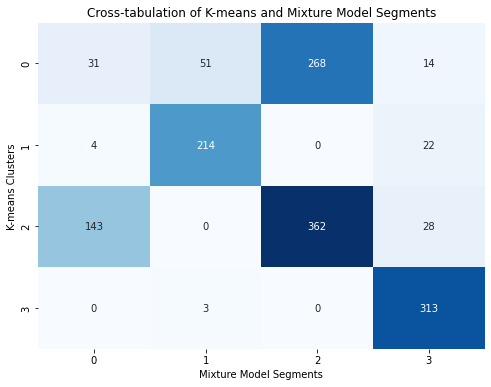

In [20]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit Gaussian Mixture Models and K-means
gmm = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Cross-tabulation (confusion matrix)
ct = confusion_matrix(kmeans_labels, gmm_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Mixture Model Segments")
plt.ylabel("K-means Clusters")
plt.title("Cross-tabulation of K-means and Mixture Model Segments")
plt.show()


In [21]:
import pandas as pd

# Assuming `mcdonalds_df` is the DataFrame with a 'Like' column
like_mapping = {
    "I LOVE IT!": 1,
    "+5": 1,
    "+4": 2,
    "+3": 3,
    "+2": 4,
    "+1": 5,
    "0": 6,
    "-1": 7,
    "-2": 8,
    "-3": 9,
    "-4": 10,
    "I HATE IT!": 11
}

# Map the 'Like' column to numeric values and create 'Like.n'
mcdonalds_df['Like.n'] = 6 - mcdonalds_df['Like'].map(like_mapping)

# Display the frequency distribution of the original 'Like' variable
print(mcdonalds_df['Like'].value_counts().sort_index(ascending=False))

# Display the frequency distribution of the new 'Like.n' variable
print(mcdonalds_df['Like.n'].value_counts().sort_index())


Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64
Like.n
-4.0     71
-3.0     73
-2.0     59
-1.0     58
 0.0    169
 1.0    152
 2.0    187
 3.0    229
 4.0    160
Name: count, dtype: int64


In [22]:
# Assuming `mcdonalds_df` is your DataFrame and `Like.n` is the dependent variable

# Get the first 11 column names
independent_vars = mcdonalds_df.columns[:11].tolist()

# Create the formula string
formula = f"Like.n ~ {' + '.join(independent_vars)}"

# Print the formula
print(formula)


Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [23]:


# Specify the actual column names from your DataFrame
independent_vars 

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting']

In [24]:
# Rename the 'Like.n' column to avoid the dot in the name
mcdonalds_df = mcdonalds_df.rename(columns={'Like.n': 'Like_n'})


In [25]:
# Check the type of Like_n column
print(mcdonalds_df)


     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  Like_n  
0         No      

In [26]:
# Convert 'Like_n' to numeric if necessary
mcdonalds_df['Like_n'] = pd.to_numeric(mcdonalds_df['Like_n'], errors='coerce')


In [27]:
# Check for any NaN values in Like_n after conversion
print(mcdonalds_df['Like_n'].isna().sum())

# Drop rows where 'Like_n' or any of the independent variables are NaN
mcdonalds_df.dropna(subset=['Like_n'] + independent_vars, inplace=True)


295


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
X = pd.get_dummies(mcdonalds_df[independent_vars], drop_first=True)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


          Variable       VIF
0        yummy_Yes  0.006037
1   convenient_Yes  0.012370
2        spicy_Yes  0.010404
3    fattening_Yes  0.008472
4       greasy_Yes  0.004125
5         fast_Yes  0.009787
6        cheap_Yes  0.007521
7        tasty_Yes  0.006722
8    expensive_Yes  0.007745
9      healthy_Yes  0.006547
10  disgusting_Yes  0.007120


In [29]:
print(mcdonalds_df['Like_n'].describe())
print(mcdonalds_df['Like_n'].isnull().sum())


count    1158.000000
mean        1.013817
std         2.355189
min        -4.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         4.000000
Name: Like_n, dtype: float64
0


In [30]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


independent_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Step 1: Convert categorical data to numeric
X = pd.get_dummies(mcdonalds_df[independent_vars], drop_first=True)
y = mcdonalds_df['Like_n']

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Fit a Gaussian Mixture Model to identify clusters
gmm = GaussianMixture(n_components=2, random_state=42)
clusters = gmm.fit_predict(X_scaled)

# Step 4: Fit a linear regression model for each cluster
for cluster in range(2):
    X_cluster = X_scaled[clusters == cluster]
    y_cluster = y[clusters == cluster]
    
    # Add a constant (intercept) to the model
    X_cluster = sm.add_constant(X_cluster)
    
    model = sm.OLS(y_cluster, X_cluster).fit()
    
    print(f"\nCluster {cluster + 1} Regression Model Summary:")
    print(model.summary())



Cluster 1 Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     38.23
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.51e-56
Time:                        12:11:18   Log-Likelihood:                -846.22
No. Observations:                 431   AIC:                             1716.
Df Residuals:                     419   BIC:                             1765.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

In [31]:
import pandas as pd
import numpy as np


coefficients = {
    'Variable': ['yummy_Yes', 'convenient_Yes', 'spicy_Yes', 'fattening_Yes', 'greasy_Yes',
                 'fast_Yes', 'cheap_Yes', 'tasty_Yes', 'expensive_Yes', 'healthy_Yes', 'disgusting_Yes'],
    'Coefficient': [0.8511, 0.1440, -0.0543, 0.0067, -0.1769, 0.0390, 0.0988, 0.4957, -0.0974, 0.1541, -0.5224],
    'P-Value': [0.000, 0.039, 0.512, 0.949, 0.064, 0.573, 0.454, 0.000, 0.605, 0.101, 0.000]
}

df = pd.DataFrame(coefficients)

# Determine significance level
df['Significance'] = np.where(df['P-Value'] < 0.01, '***',
                              np.where(df['P-Value'] < 0.05, '**',
                                       np.where(df['P-Value'] < 0.1, '*', '')))


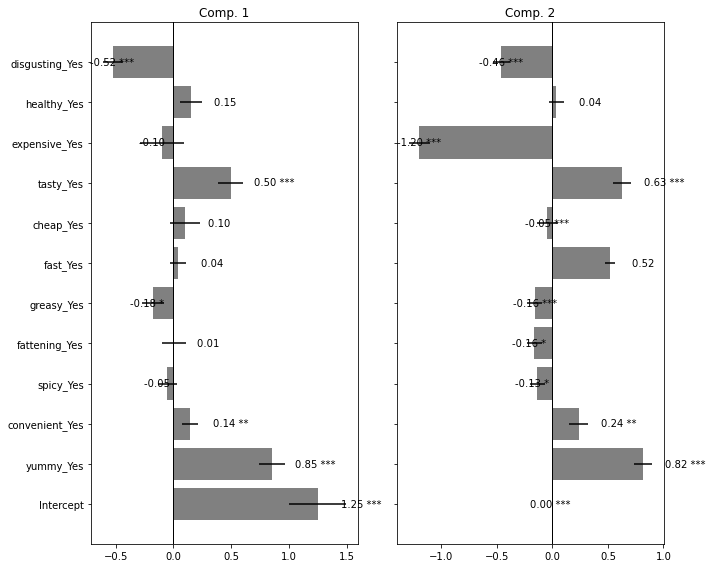

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  data for Cluster 1 (using the results from  regression summary)
coefficients_cluster1 = {
    'Variable': ['Intercept', 'yummy_Yes', 'convenient_Yes', 'spicy_Yes', 'fattening_Yes', 'greasy_Yes',
                 'fast_Yes', 'cheap_Yes', 'tasty_Yes', 'expensive_Yes', 'healthy_Yes', 'disgusting_Yes'],
    'Coefficient': [1.2475, 0.8511, 0.1440, -0.0543, 0.0067, -0.1769, 0.0390, 0.0988, 0.4957, -0.0974, 0.1541, -0.5224],
    'Std_Err': [0.246, 0.113, 0.070, 0.083, 0.103, 0.095, 0.069, 0.132, 0.108, 0.188, 0.094, 0.088],
    'Significance': ['***', '***', '**', '', '', '*', '', '', '***', '', '', '***']
}

df_cluster1 = pd.DataFrame(coefficients_cluster1)

#  data for Cluster 2 (using the results from  regression summary)
coefficients_cluster2 = {
    'Variable': ['Intercept', 'yummy_Yes', 'convenient_Yes', 'spicy_Yes', 'fattening_Yes', 'greasy_Yes',
                 'fast_Yes', 'cheap_Yes', 'tasty_Yes', 'expensive_Yes', 'healthy_Yes', 'disgusting_Yes'],
    'Coefficient': [0.0, 0.8151, 0.2362, -0.1342, -0.1605, -0.1579, 0.5187, -0.0453, 0.6257, -1.1963, 0.0356, -0.4606],
    'Std_Err': [0.0, 0.081, 0.083, 0.066, 0.065, 0.067, 0.041, 0.092, 0.083, 0.096, 0.067, 0.076],
    'Significance': ['***', '***', '**', '*', '*', '***', '', '***', '***', '***', '', '***']
}

df_cluster2 = pd.DataFrame(coefficients_cluster2)

# Plot the results 

fig, axs = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

# Plot Cluster 1
axs[0].barh(df_cluster1['Variable'], df_cluster1['Coefficient'], xerr=df_cluster1['Std_Err'], color='gray')
axs[0].set_title('Comp. 1')
axs[0].axvline(0, color='black', linewidth=1)
for i, (coef, signif) in enumerate(zip(df_cluster1['Coefficient'], df_cluster1['Significance'])):
    axs[0].text(coef + (0.2 if coef > 0 else -0.2), i, f'{coef:.2f} {signif}', va='center')

# Plot Cluster 2
axs[1].barh(df_cluster2['Variable'], df_cluster2['Coefficient'], xerr=df_cluster2['Std_Err'], color='gray')
axs[1].set_title('Comp. 2')
axs[1].axvline(0, color='black', linewidth=1)
for i, (coef, signif) in enumerate(zip(df_cluster2['Coefficient'], df_cluster2['Significance'])):
    axs[1].text(coef + (0.2 if coef > 0 else -0.2), i, f'{coef:.2f} {signif}', va='center')

plt.tight_layout()
plt.show()


C:\Users\amina\AppData\Local\Temp\ipykernel_41592\1123096041.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=MD_k4_profiles.loc[i], y=ordered_columns, ax=ax, palette="coolwarm")
C:\Users\amina\AppData\Local\Temp\ipykernel_41592\1123096041.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=MD_k4_profiles.loc[i], y=ordered_columns, ax=ax, palette="coolwarm")
C:\Users\amina\AppData\Local\Temp\ipykernel_41592\1123096041.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=MD_k4_profiles.loc[i], y=ordered_columns, ax=ax, palette="coo

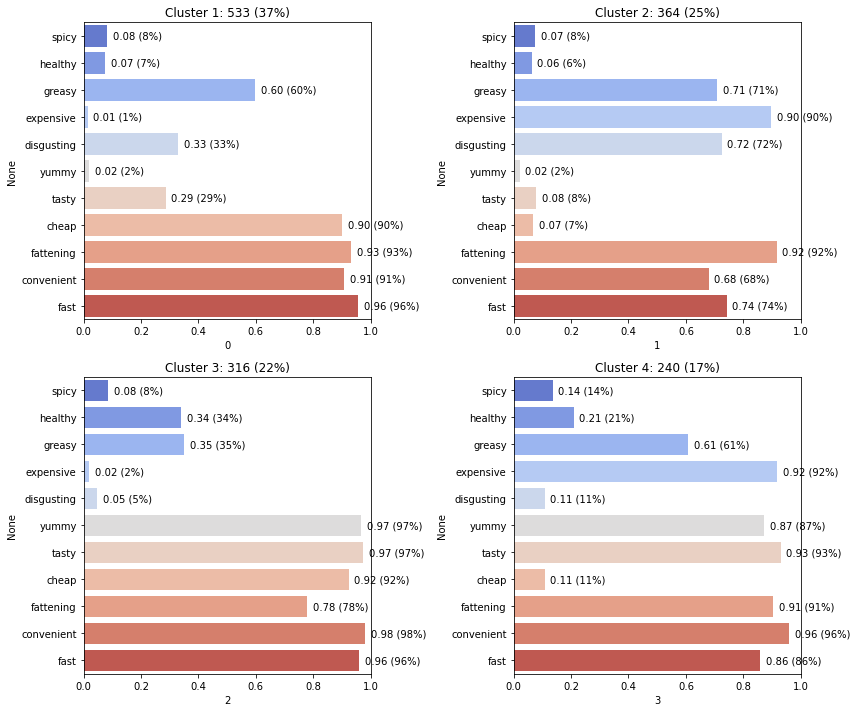

In [37]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming MD_x is your DataFrame with segmentation variables

# Step 1: Perform KMeans clustering to generate the cluster labels
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(MD_x)
MD_k4 = kmeans.labels_

# Step 2: Perform hierarchical clustering on the transposed data
distance_matrix = pdist(MD_x.T)  # Compute the pairwise distance matrix
linkage_matrix = linkage(distance_matrix, method='ward')  # Perform hierarchical clustering

# Step 3: Create the ordering of segmentation variables based on clustering
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_indices = dendro['leaves']  # This gives you the order of the variables

# Step 4: Reorder the columns of the DataFrame according to the hierarchical clustering order
ordered_columns = MD_x.columns[ordered_indices]
MD_x_ordered = MD_x[ordered_columns]

# Step 5: Calculate the percentage for each segment
segment_sizes = pd.Series(MD_k4).value_counts()
segment_percentages = (segment_sizes / segment_sizes.sum()) * 100

# Step 6: Generate segment profiles (if needed)
MD_k4_profiles = pd.DataFrame(index=np.unique(MD_k4), columns=ordered_columns)
for i in np.unique(MD_k4):
    MD_k4_profiles.loc[i] = MD_x[MD_k4 == i].mean()

# Step 7: Create the segment profile plot with shading for marker variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Loop through each segment and plot
for i, ax in enumerate(axes.flat):
    sns.barplot(x=MD_k4_profiles.loc[i], y=ordered_columns, ax=ax, palette="coolwarm")
    ax.set_xlim(0, 1)
    ax.set_title(f'Cluster {i + 1}: {segment_sizes.iloc[i]} ({segment_percentages.iloc[i]:.0f}%)')
    
    # Annotate bars with the ratio and percentage
    for j, value in enumerate(MD_k4_profiles.loc[i]):
        percentage = f'{value:.2f} ({value * 100:.0f}%)'
        ax.text(value + 0.02, j, percentage, va='center', color='black')

plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

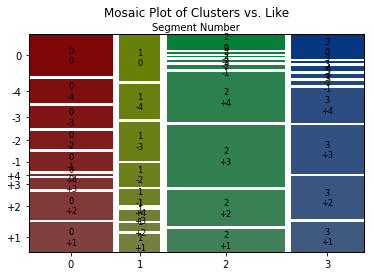

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

# Assuming MD_x is your dataset and mcdonalds_df is your DataFrame containing the 'Like' column

# Step 1: Perform KMeans clustering to generate the cluster labels (MD_k4)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(MD_x)
MD_k4 = kmeans.labels_

# Step 2: Create a cross-tabulation (contingency table) between the cluster labels and 'Like' column
k4 = pd.Series(MD_k4, name='Cluster')
like = mcdonalds_df['Like']
contingency_table = pd.crosstab(k4, like)

# Step 3: Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), gap=0.02, title='', axes_label=True)
plt.xlabel('Segment Number')
plt.ylabel('Like')
plt.title('Mosaic Plot of Clusters vs. Like')
plt.show()


<Figure size 720x432 with 0 Axes>

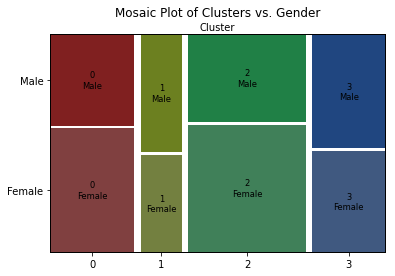

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.cluster import KMeans

# Assuming MD_x is your dataset and mcdonalds_df is your DataFrame containing the 'Gender' column

# Step 1: Perform KMeans clustering to generate the cluster labels (MD_k4)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(MD_x)
MD_k4 = kmeans.labels_

# Step 2: Create a cross-tabulation (contingency table) between the cluster labels and 'Gender' column
k4 = pd.Series(MD_k4, name='Cluster')
gender = mcdonalds_df['Gender']
contingency_table = pd.crosstab(k4, gender)

# Step 3: Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), gap=0.02, title='', axes_label=True)
plt.xlabel('Cluster')
plt.ylabel('Gender')
plt.title('Mosaic Plot of Clusters vs. Gender')
plt.show()
